# Introduction
- このノートブックはplotlyの簡単な使い方をまとめることを目的としています。

- 公式サイト
    > https://plot.ly/python/

- plotly と matplotlib の違いについて。
    - 描画がきれい
    - 文法が単純で使いやすい
    - インタラクティブにグラフを触れる
    
- インタラクティブな操作例(gif)  
    - マウスオーバーで値が確認できます。右上のボタンで何を表示するかをコントロールできます。
    <img src="./02_plotly/plotly0.gif" width="700">  
 
    - クリックしながらドラッグで拡大できます。ダブルクリックで元に戻ります。  
    <img src="./02_plotly/plotly1.gif" width="700">    

    - 軸メモリ付近にマウスを持っていくと形が変わります。その状態でドラッグすると平行移動ができます。
    <img src="./02_plotly/plotly2.gif" width="700">  

    - 凡例をクリックすると表示/非表示を切り替えられます  
    <img src="./02_plotly/plotly3.gif" width="700">    

# Installation
- jupyter labで使うことを想定しています。

# Import everything I nead :)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools
# import plotly.offline as offline
# offline.init_notebook_mode()

# Data Preparation

In [2]:
iris = load_iris()
data_iris = iris.data
feat_names = iris.feature_names
target = iris.target
target_names = iris.target_names

df = pd.DataFrame(data_iris, columns=feat_names)
df['target'] = target

# 2D
- これから、簡単な使い方を一通り紹介します。
- 基本的には、iplot 関数に`data` と `layout` を渡すだけです。
    - `data`: グラフのデータ、形、色などの情報
    - `layout`: グラフの軸、背景、タイトルなどを編集するときに使います。

## Scatter

- **minimum example**

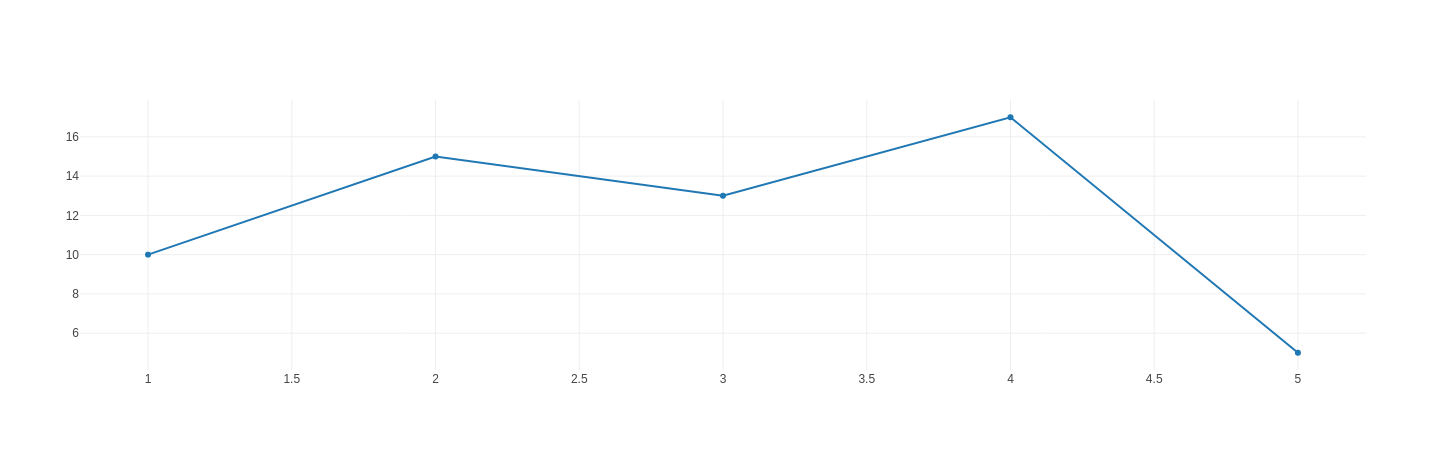

In [12]:
x=[1, 2, 3, 4, 5]
y=[10, 15, 13, 17, 5]

trace = go.Scatter(x=x, y=y)

iplot([trace])

- **mode = (lines, markers, markers+lines)**
- **size**
- **color**
- その他のパラメータは下記を参照
    > example: https://plot.ly/python/line-and-scatter/  
    > ref: https://plot.ly/python/reference/

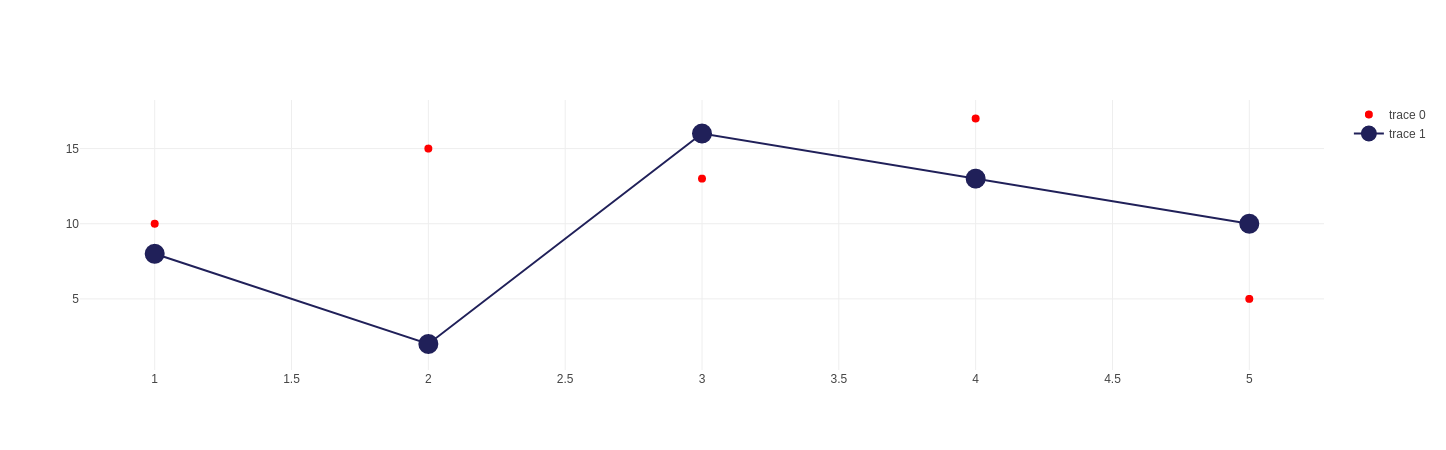

In [13]:
trace0 = go.Scatter(x=[1, 2, 3, 4, 5],
                    y=[10, 15, 13, 17, 5],
                    mode='markers',
                    marker=dict(size=8,
                                color='red')) 

trace1 = go.Scatter(x=[1, 2, 3, 4, 5],
                    y=[8, 2, 16, 13, 10],
                    mode='markers + lines',
                    marker=dict( size=20,
                                color='#202059'))

data = [trace0, trace1]
iplot(data)

- **Layout**
- その他のパラメータは下記を参照
    > Axes: https://plot.ly/python/axes/

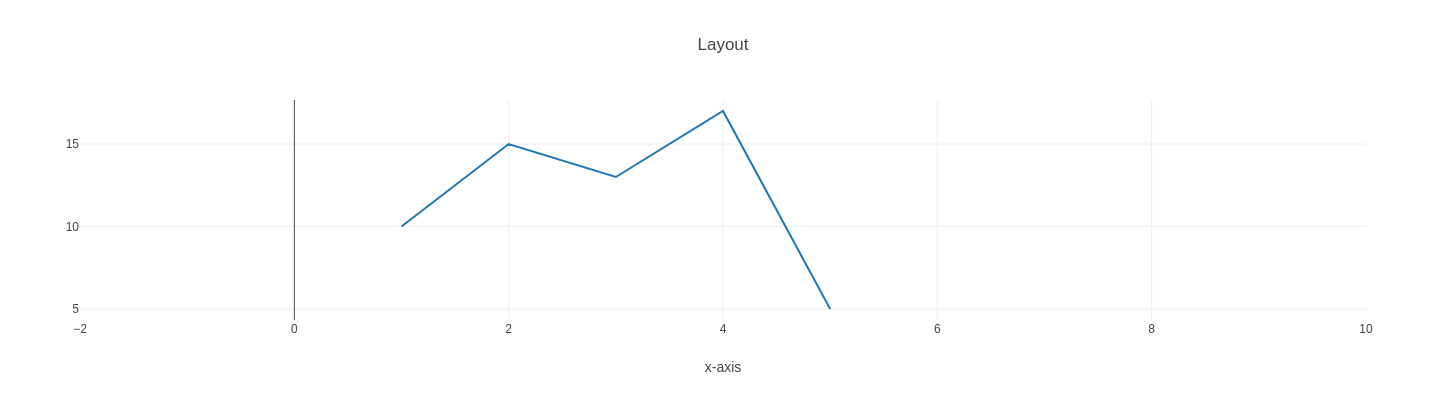

In [5]:
trace0 = go.Scatter(x=[1, 2, 3, 4, 5],
                    y=[10, 15, 13, 17, 5],
                    mode='lines')

layout = go.Layout(title='Layout',
                   height=400,
                   width=400,
                   xaxis=dict(title='x-axis',
                              range=[-2, 10]),)
data = [trace0]
fig = dict(data=data, layout=layout)
iplot(fig)

## Histogram

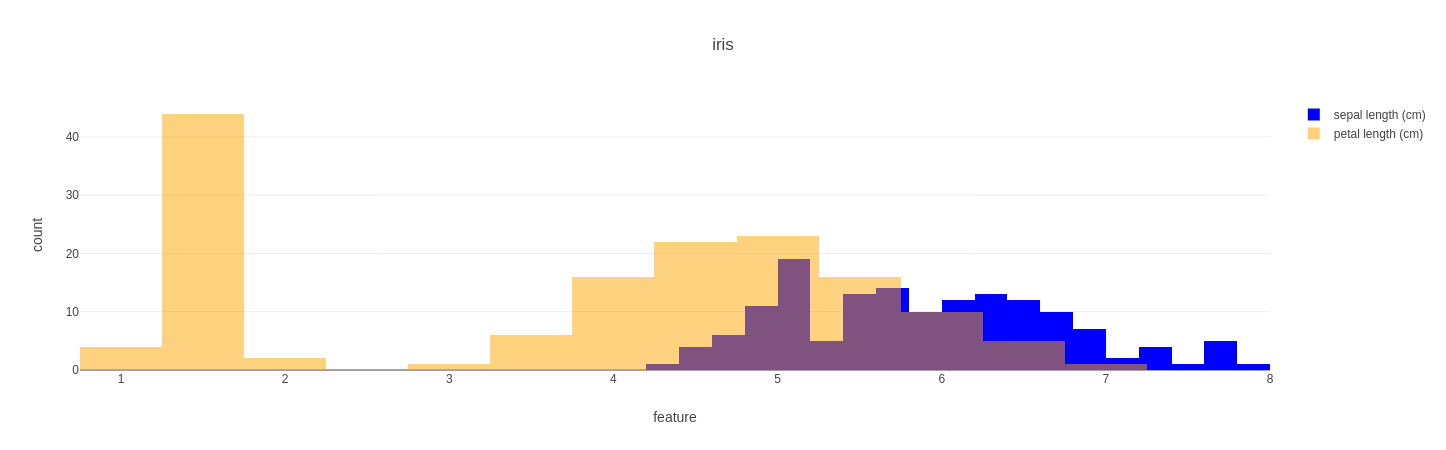

In [7]:
x0 = data_iris[:,0]
x1 = data_iris[:,2]

# trace
trace0 = go.Histogram(x=x0,
                      nbinsx=20,     # bins
                      name=feat_names[0],
                      marker=dict(color='blue'),)
trace1 = go.Histogram(x=x1,
                      name=feat_names[2],
                      marker=dict(color='orange'),
                      opacity=0.5)
data = [trace0, trace1]

# layout
layout = go.Layout(barmode='overlay',
                   title='iris',
                   xaxis=dict(title='feature'),
                   yaxis=dict(title='count'))

# fig = go.Figure(data=data, layout=layout)
fig = dict(data=data, layout=layout)
iplot(fig)

## Bar Chart

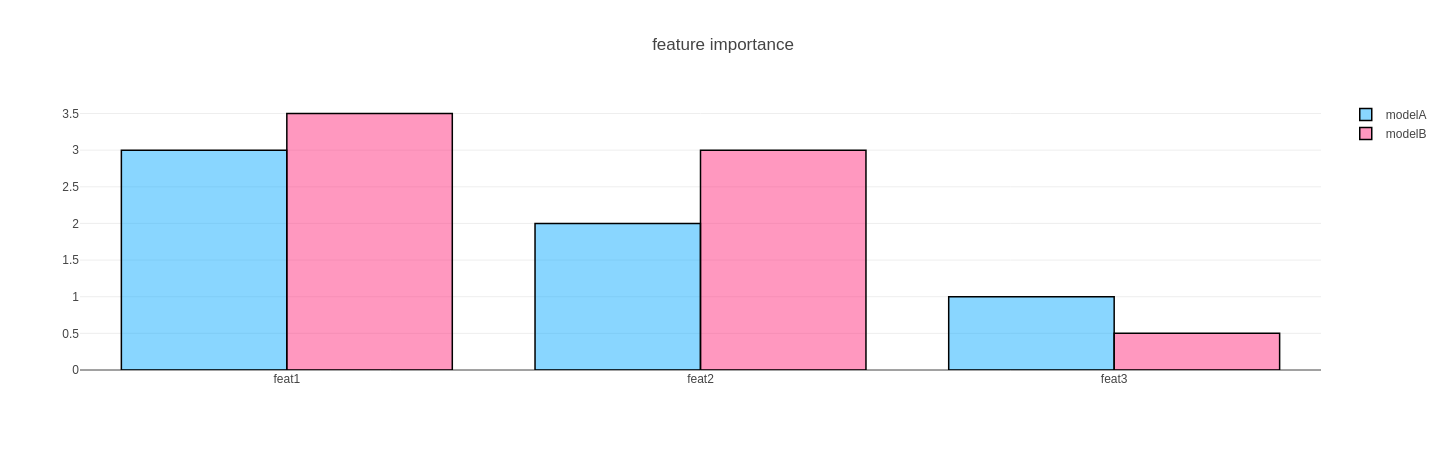

In [9]:
feat_names_ = ['feat1', 'feat2', 'feat3']
 
trace1 = go.Bar(x=feat_names_,
                y=[3, 2, 1],
                name="modelA",
                marker=dict(color = 'rgba(20, 174, 255, 0.5)',
                            line=dict(color='rgb(0,0,0)',width=1.5)))
trace2 = go.Bar(x=feat_names_,
                y=[3.5, 3, 0.5],
                name = "modelB",
                marker = dict(color = 'rgba(255, 50, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

data = [trace1, trace2]
layout = go.Layout(barmode = "group", title='feature importance')
fig = go.Figure(data = data, layout = layout)
fig = dict(data=data, layout=layout)
iplot(fig)

## Multiple Subplots 
- example: https://plot.ly/python/subplots/

**minimum example**

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



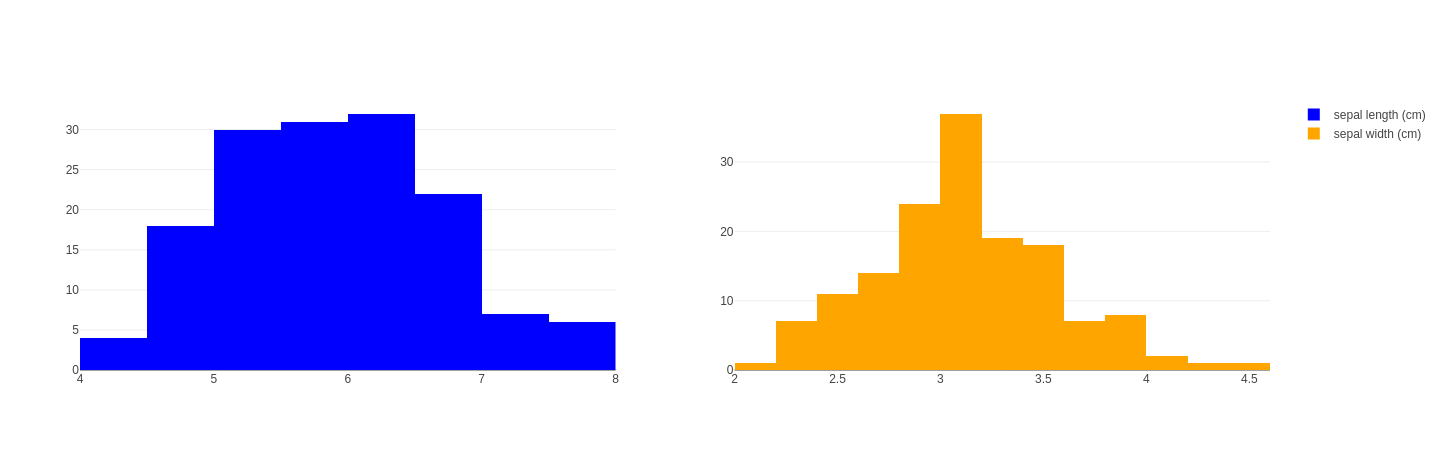

In [10]:
x1 = df.iloc[:, 1]
x2 = df.iloc[:, 2]

# trace
trace1 = go.Histogram(x=x0,
                      name=feat_names[0],
                      marker=dict(color='blue'))
trace2 = go.Histogram(x=x1,
                      name=feat_names[1],
                      marker=dict(color='orange'))
data = [trace1, trace2]


fig = tools.make_subplots(rows=1, cols=2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

iplot(fig)

**domain(調整)**

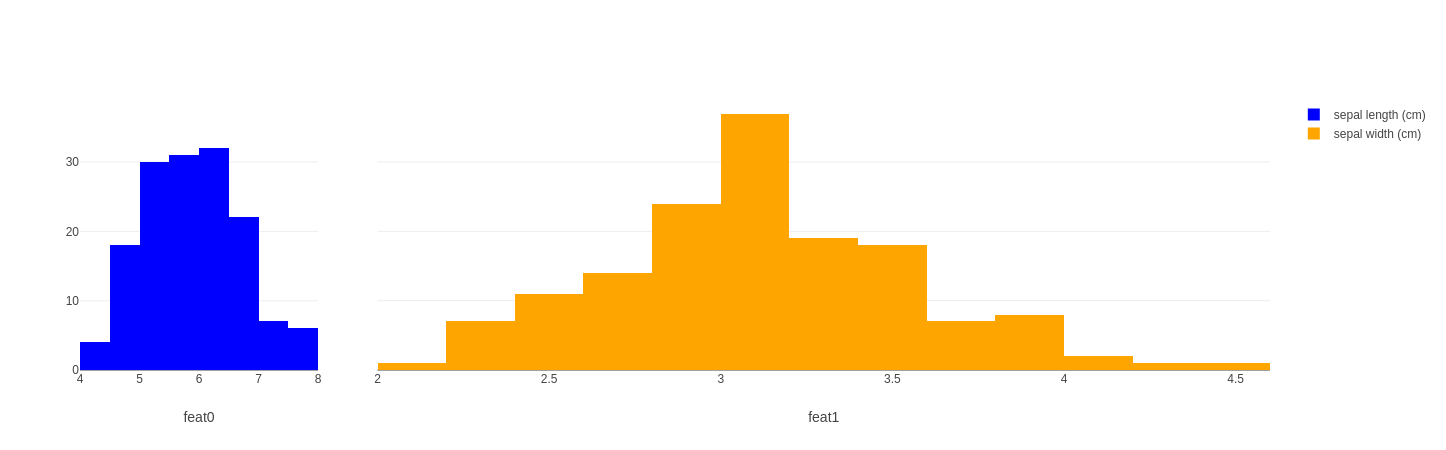

In [14]:
x1 = df.iloc[:, 1]
x2 = df.iloc[:, 2]

# trace
trace1 = go.Histogram(x=x0,
                      name=feat_names[0],
                      marker=dict(color='blue'),
                      xaxis='x1')
trace2 = go.Histogram(x=x1,
                      name=feat_names[1],
                      marker=dict(color='orange'),
                      xaxis='x2')
data = [trace1, trace2]

# domain は [0 1] の範囲で指定。
layout = go.Layout(xaxis= dict(domain=[0, 0.2], anchor='x1', title='feat0'),
                   yaxis= dict(),
                   xaxis2=dict(domain=[0.25, 1], anchor='x2', title='feat1'),
                   yaxis2=dict())
# fig = go.Figure(data=data, layout=layout)
fig = dict(data=data, layout=layout)
iplot(fig)

**make_suplots**

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



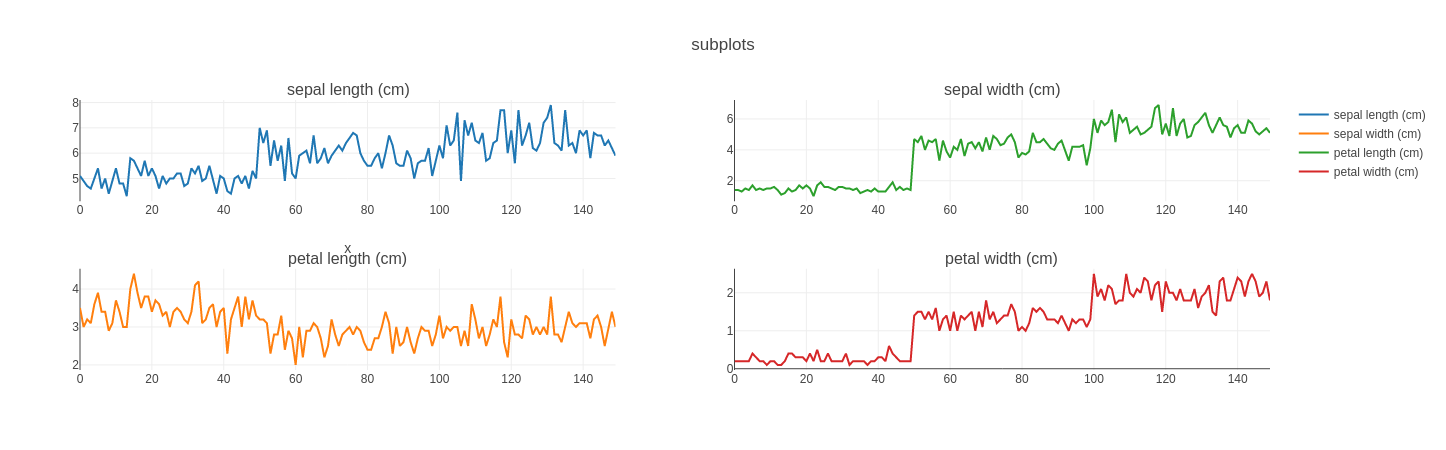

In [6]:
trace0 = go.Scatter(y=df['sepal length (cm)'], name=df.columns[0])
trace1 = go.Scatter(y=df['sepal width (cm)'], name=df.columns[1])
trace2 = go.Scatter(y=df['petal length (cm)'], name=df.columns[2])
trace3 = go.Scatter(y=df['petal width (cm)'], name=df.columns[3])

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=df.columns[:4])
fig.append_trace(trace0, 1,1)
fig.append_trace(trace1, 2,1)
fig.append_trace(trace2, 1,2)
fig.append_trace(trace3, 2,2)
fig['layout'].update(title='subplots',
                     xaxis1={'title': 'x'},
#                      xaxis4={"rangeslider": {"visible": True}}
                     )
iplot(fig)

## scatterplot matrix

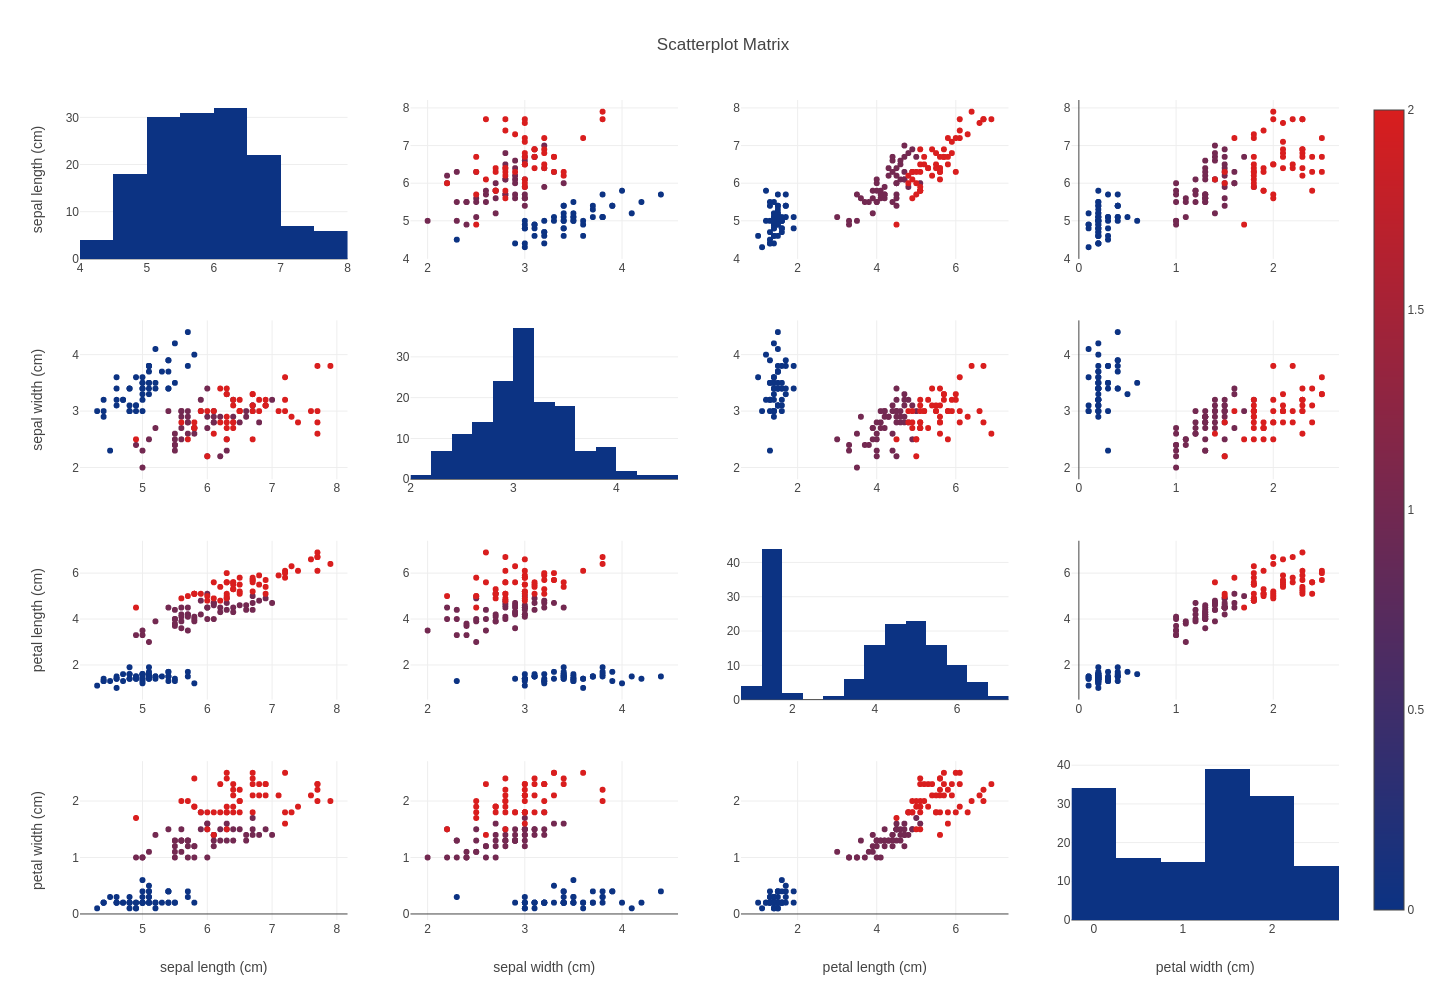

In [15]:
fig = ff.create_scatterplotmatrix(df, index='target',
                                  diag='histogram',
                                  colormap='Portland', 
                                  colormap_type='cat',
                                  height=1000,
                                  width=1000)
iplot(fig)

## distplot

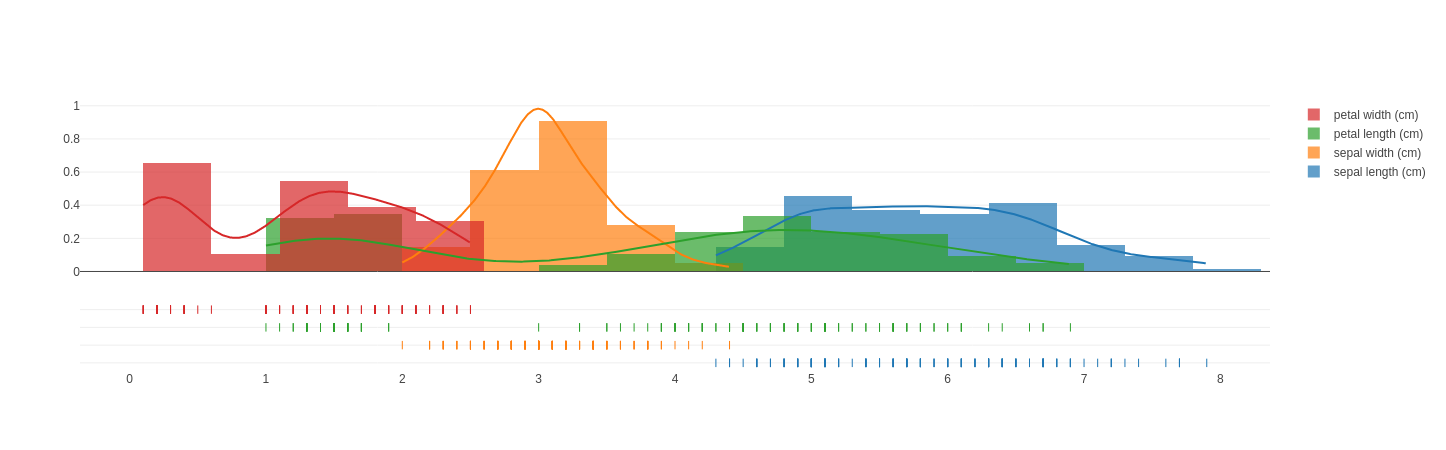

In [16]:
hist_data = [df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3]]
group_labels = feat_names

layout = go.Layout(width=100)
fig = ff.create_distplot(hist_data,
                         group_labels,
                         bin_size=0.5)
iplot(fig)

# 3D

**lines**

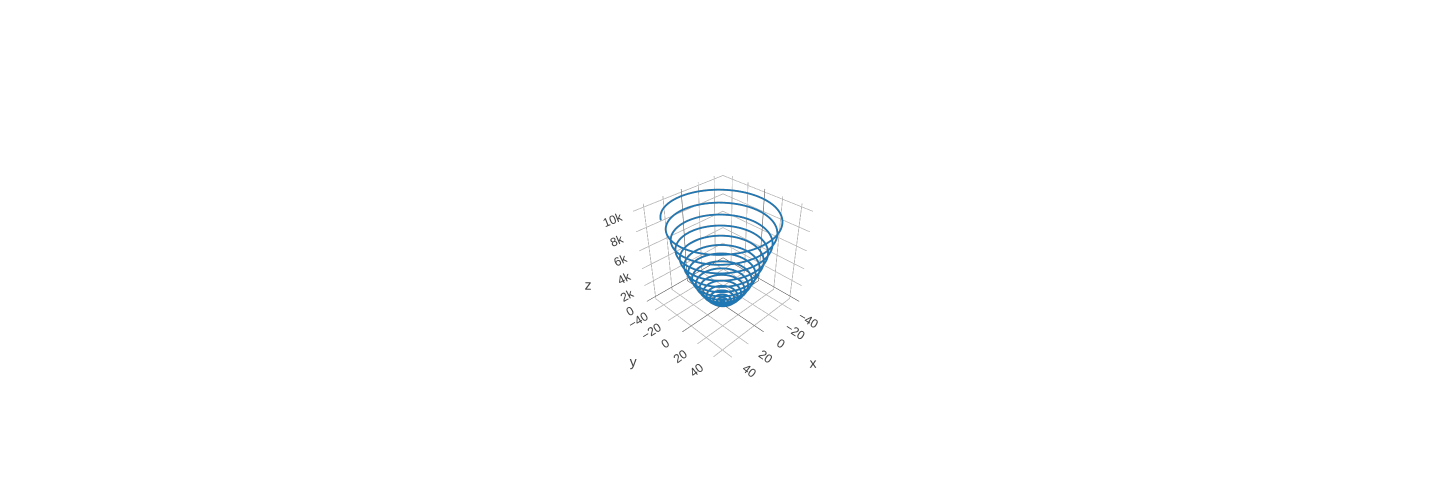

In [17]:
t = np.arange(0, 100, 0.01)
x = np.cos(t) * (0.5*t)
y = np.sin(t) * (0.5*t)
z = t**2

# data
scatter = go.Scatter3d(x=x, y=y, z=z, mode='markers',
                       marker=dict(size=0.5))
data = [scatter]

# layout
layout = go.Layout(width=500, height=500)

# fig = go.Figure(data=data, layout=layout)
fig = dict(data=data, layout=layout)
iplot(fig)

**scatter**

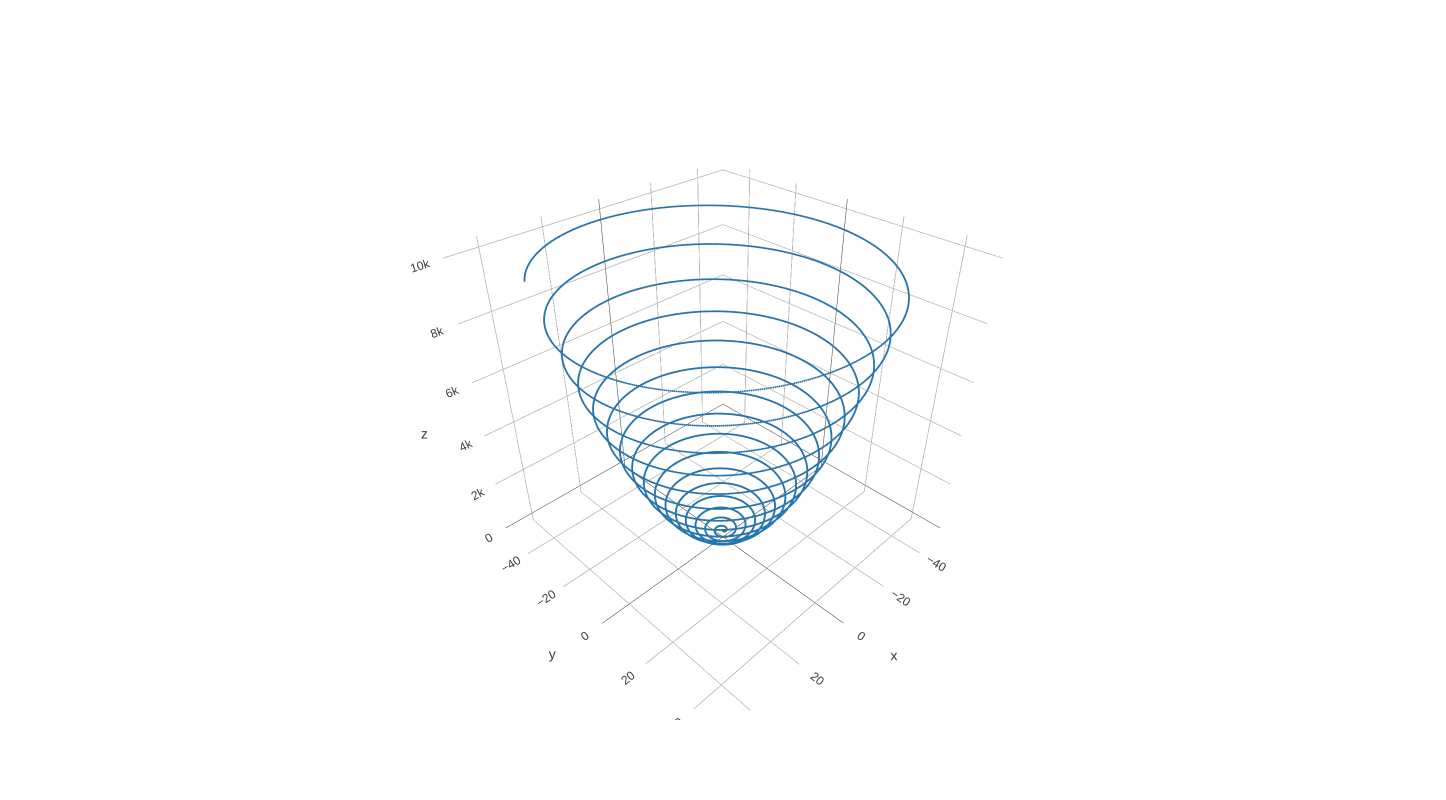

In [19]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
z = df.iloc[:, 2]

# color、colorscale、showscaleは省略可
scatter = go.Scatter3d(x=x, y=y, z=z, mode='markers',
                       marker=dict(size=2,                  # マーカーのサイズ
                                   color=df['target'],                 # 色分けに使う数値（任意の数値を指定可）
                                   colorscale='Viridis',    # 色のパターン
                                   showscale=True)          # カラーバーを表示
                       )

layout = go.Layout(height=800, width=800)  # 画像サイズの調整
# fig = go.Figure(data=[scatter], layout=layout)
fig = dict(data=data, layout=layout)
iplot(fig, image_width=20, image_height=100)

# Widget

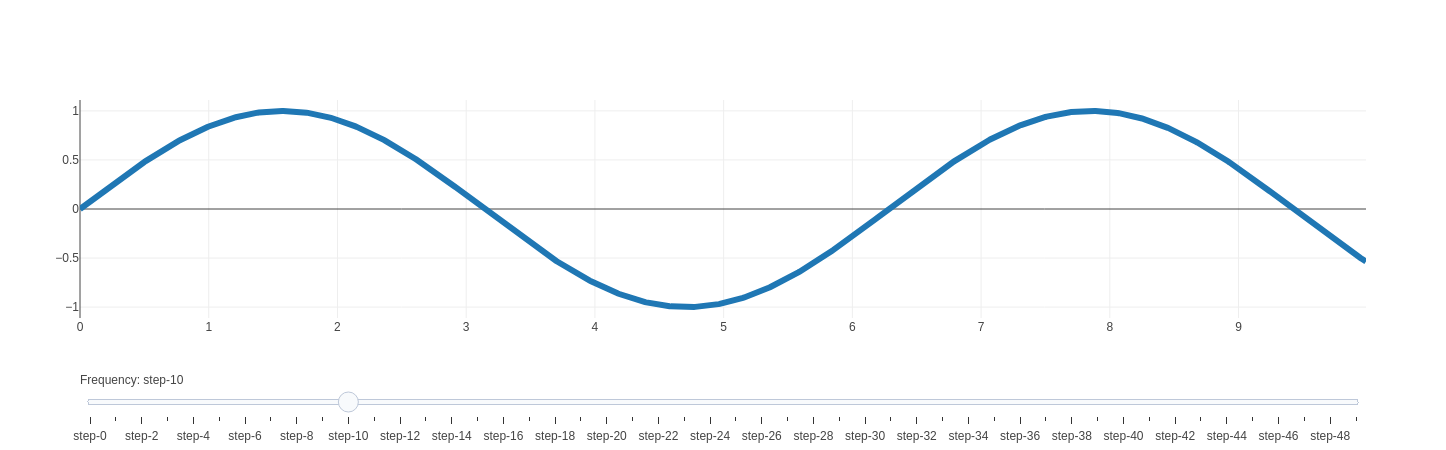

In [20]:
data = [dict(
        visible = False,
        line=dict(width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True     # 最初に描画するもの

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = go.FigureWidget(data = data, layout = layout)
iplot(fig)

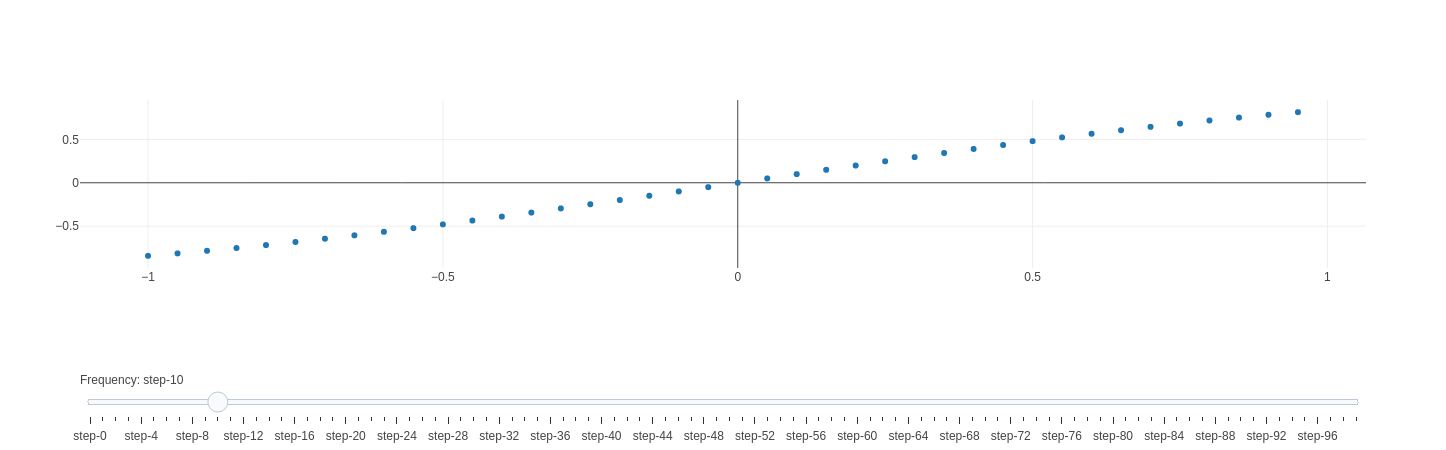

In [21]:
def create_func(x, n):
    return np.sin(n*x)

x=np.arange(-1, 1, 0.05)
data = [dict(visible=False,
             mode='markers',
             x=x,
             y=create_func(x, n))
        for n in range(100)]
data[1]['visible'] = True

steps = []
for i in range(len(data)):
    n = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    n['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(n)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 100},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = go.FigureWidget(data = data, layout = layout)
iplot(fig)

# animation

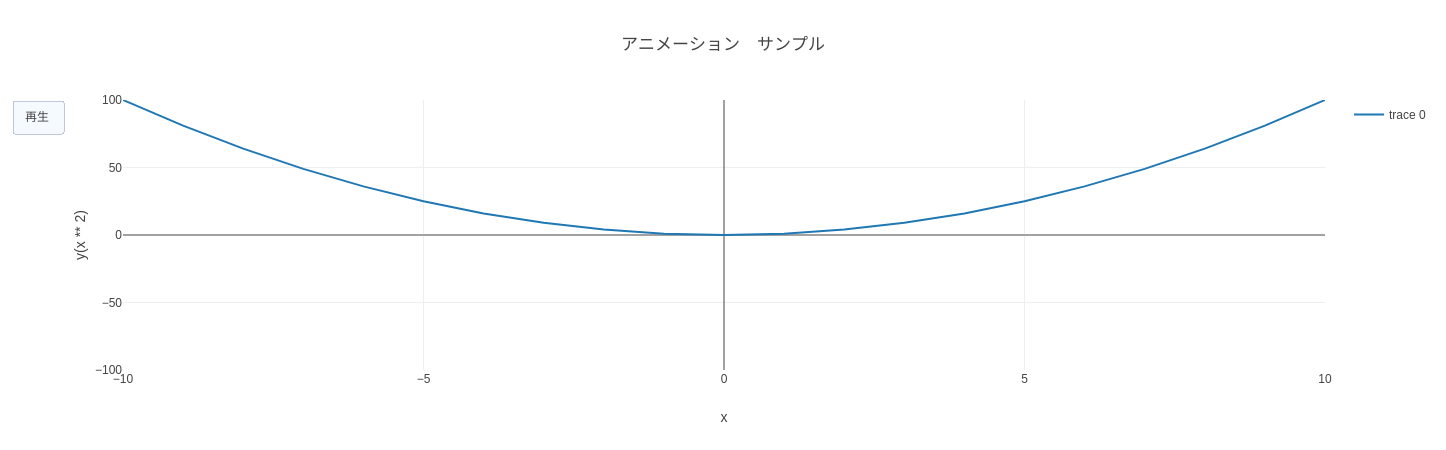

In [5]:
frames = []
xaxis = []

# framesに突っ込んだデータの通りに、勝手にアニメーションしてくれる。
# 今回は y = x **2のグラフを想定している。
for x in np.arange(-10,11,1):
    xaxis.append(x)
    data = [
        go.Scatter(
            x = xaxis,
            y = np.array(xaxis) ** 2
        )
    ]
    frames.append({"data": data})



layout = go.Layout(
    title="アニメーション　サンプル",
    xaxis={"title":"x", "range": [-10, 10]},
    yaxis={"title":"y(x ** 2)", "range":  [-100, 100]},
    showlegend=True,
    height=600,
    updatemenus=[{'type': 'buttons',
                     'buttons': [{'label': '再生',
                                  'method': 'animate',
                                  'args': [None]}]}]
)

fig = dict(data=data, layout=layout, frames=frames)

iplot(fig)

# Finish!!
- 最小のコードのみをまとめました。こみいったことをしたい場合は、以下で似たようなのを探すといいです。
- https://plot.ly/python/